#Setup

In [ ]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil --q
!pip install psutil --q
!pip install humanize --q
!pip install emoji
!pip install PySastrawi
!pip install nltk
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.4 MB/s 
  Created wheel for emoji: filename=emoji-2.1.0-py3-none-any.whl size=212392 sha256=8d0e10de7c08ac2d8b50ba00614e77942a8a724d828fb6fbb6fb0a8fa804cd2e
  Stored in directory: /root/.cache/pip/wheels/77/75/99/51c2a119f4cfd3af7b49cc57e4f737bed7e40b348a85d82804
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 210 kB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 5.0 MB/s 
     |████████████████████████████████| 6.6 MB 52.2 MB/s 
     |████████████████████████████████| 163 kB 73.7 MB/s 


In [ ]:
#import library
import numpy as np
import pandas as pd
import regex as re
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
nltk.download('punkt')
nltk.download('stopwords')
stopwords.words('indonesian')
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import BertModel
import torch
from transformers import BertTokenizer
import statistics
import random
import time
import datetime
from transformers import AdamW
from transformers import get_linear_schedule_with_warmup
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as skm
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import psutil
import humanize
import os
import GPUtil as GPU
   

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
GPUs = GPU.getGPUs()
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()
if torch.cuda.is_available():       
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")



Gen RAM Free: 11.4 GB  | Proc size: 786.3 MB
GPU RAM Free: 15109MB | Used: 0MB | Util   0% | Total 15109MB
There are 1 GPU(s) available.
We will use the GPU: Tesla T4


#Import data

In [ ]:
url = 'https://raw.githubusercontent.com/bayuazra23/Tugas/main/Datase%20EP.csv'
df = pd.read_csv(url,index_col=0)

#Preprocessing

In [ ]:
df

,Tanggal Tweet,Username,Tweet,Sentimen
0.0,2022-09-24 05:53:24+00:00,masakoyayam,@hyang_wisnu @kemkominfo @PlateJohnny @jokowi ...,positif
1.0,2022-09-24 04:26:17+00:00,masakoyayam,@hyang_wisnu @PlateJohnny @Aryprasetyo85 @kemk...,netral
NaN,NaN,NaN,NaN,NaN
3.0,2022-09-23 14:09:14+00:00,masakoyayam,@hyang_wisnu @PlateJohnny Semoga dengan kejadi...,positif
4.0,2022-09-23 05:42:30+00:00,tinqts2,Menkominfo Johnny Plate: Perusahaan yang Bocor...,netral
...,...,...,...,...
845.0,2020-03-10 15:05:09+00:00,kemkominfo,"6. Menurut Menkominfo @PlateJohnny, aturan tek...",netral
846.0,2019-11-18 07:34:17+00:00,JppIndonesia,Dengan diundangkannya UU 71/2019 tentang Penye...,netral
847.0,2019-11-16 12:02:42+00:00,gprtv,Dengan diundangkannya UU 71/2019 tentang Penye...,netral
848.0,2018-05-24 07:08:41+00:00,barkahwibowo,"setelah rame data facebook bocor, yang PSE men...",negatif


In [ ]:
df['Sentimen'] = df['Sentimen'].str.lower().replace({'netal': 'netral', 'positif ': 'positif' , 'netral ':'netral', 'negatif ': 'negatif'})

In [ ]:
data = df[["Tweet","Sentimen"]]
pre = data

In [ ]:
data = data.dropna()
pre = pre.dropna()


print(data.shape)
print(data.isnull().sum())
print(data.isnull().sum())

(849, 2)
Tweet       0
Sentimen    0
dtype: int64
Tweet       0
Sentimen    0
dtype: int64


In [ ]:
data = data.reset_index(drop = True)
pre = pre.reset_index(drop = True)
data['Tweet'], data['Sentimen'] = data['Tweet'].str.lower(), data['Sentimen'].str.lower() 
pre['lower case'] = data['Tweet'].str.lower()
pd.options.mode.chained_assignment = None  

In [ ]:
pre['cleaned'] = pre['lower case']
for i in range(0, 849):
  temp = data['Tweet'][i]
  temp = re.sub(r'\n', ' ', temp )
  temp = re.sub('[ ]+',' ',temp)
  temp = re.sub('(?<=^|(?<=[^a-zA-Z0-9-\.]))@([A-Za-z0-9_]+)',"", temp)
  temp = re.sub(r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})", "", temp)
  temp = re.sub("#[A-Za-z0-9_]+","", temp)
  temp = re.sub('[^a-zA-Z,.?!]+',' ',temp)
  temp = emoji.demojize(temp)
  temp= re.sub(':[A-Za-z_-]+:', ' ', temp) 

  data['Tweet'][i] = temp
  pre['cleaned'][i] = temp



##slang list

In [ ]:
slang={"@": "di", "abis": "habis", "ad": "ada", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}





##.

In [ ]:
data['Tweet'] = data['Tweet'].apply(lambda x: ' '.join(slang.get(word,word) for word in x.split()))
pre['formalized'] = pre['cleaned'].apply(lambda x: ' '.join(slang.get(word,word) for word in x.split()))

In [ ]:
pre['no stopwords'] = pre['formalized']
stop_words = set(stopwords.words('indonesian'))
factory = StemmerFactory()
stemmer = factory.create_stemmer()
for i in range(0, (len(data))):
  temp = data['Tweet'][i]
  words = word_tokenize(temp)
  wordsFiltered = []
 
  for w in words:
    if w not in stop_words:
      wordsFiltered.append(w)
    
  data["Tweet"][i] = ' '.join(wordsFiltered)
  pre['no stopwords'][i] = ' '.join(wordsFiltered)


pre['stemmed'] = pre['no stopwords']
for i in range(0, (len(data))):
  temp = pre['stemmed'][i]
  temp = stemmer.stem(temp)
  pre['stemmed'][i] = temp
  data['Tweet'][i] = temp


In [ ]:
pre.to_excel('Preprocessing.xlsx') #export preprocessing process

#Preparation

In [ ]:
tokenizer = BertTokenizer.from_pretrained("indolem/indobert-base-uncased", do_lower_case=True)

Downloading:   0%|          | 0.00/234k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

In [ ]:
data['Sentimen'] = data['Sentimen'].replace({'netal': 'netral', 'positif ': 'positif' , 'netral ':'netral', 'negatif ': 'negatif'})
data['Sentimen'] = data['Sentimen'].replace({'netral': 0, 'positif': 1, 'negatif':2})

In [ ]:
train = data
test = data[600:]
sentences = train["Tweet"].values
test_sentences = test["Tweet"].values
labels = train["Sentimen"].values

In [ ]:
sent_length = []


for sent in sentences:
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    sent_length.append(len(input_ids))

print('Average length = ', sum(sent_length)/len(sent_length))
print('Median length = ', statistics.median(sent_length))

Average length =  20.63133097762073
Median length =  21


In [ ]:
input_ids = []
attention_masks = []
for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 100,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2308: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  undang undang tunggu sah
Token IDs: tensor([   3, 2613, 2613, 9820, 2538,    4,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0])


#Training Model

In [ ]:
dataset = TensorDataset(input_ids, attention_masks, labels)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

  679 training samples
  170 validation samples


In [ ]:
batch_size = 32
train_dataloader = DataLoader(
            train_dataset,  
            sampler = RandomSampler(train_dataset), 
            batch_size = batch_size 
        )
validation_dataloader = DataLoader(
            val_dataset, 
            sampler = SequentialSampler(val_dataset), 
            batch_size = batch_size 
        )

#Training (Don't Run It)

In [ ]:
model = BertForSequenceClassification.from_pretrained(
    "indolem/indobert-base-uncased", 
    num_labels = 3, 
    output_attentions = False, 
    output_hidden_states = False, 
)

# model.to(device)
model.cuda()

Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the model checkpoint at indolem/indobert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indober

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(31923, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, 
                  eps = 1e-8
                )

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
epochs = 20

print('Jumlah batch :', len(train_dataloader))
total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, 
                                            num_training_steps = total_steps)

Jumlah batch : 22


## Training Loop

In [ ]:

def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
CUDA_LAUNCH_BLOCKING =1

In [ ]:
seed_val = 32

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

loss_values = []
y_true_val=[]
y_pred_val = []

for epoch_i in range(0, epochs):

  # ===================================
  #              Training
  # ===================================

  print("======= Epoch {:} / {:} =======".format(epoch_i+1, epochs))
  print("Training...")

  t0 = time.time()

  total_loss = 0
  train_accuracy = 0
  model.train()

  for step, batch in enumerate(train_dataloader):
    
    if step % 10 == 0 and not step == 0:
      elapsed = format_time(time.time() - t0)

      print("Batch {:>5,} of {:>5,}.     Elapsed: {:}".format(step, len(train_dataloader), elapsed))
    
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)

    model.zero_grad()

    outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)
    
    loss = outputs[0]
    pred = outputs[1]
    pred = pred.detach().cpu().numpy()
    total_loss += loss.item()

    loss.backward()
    label_ids = b_labels.to('cpu').numpy()

    tmp_train_accuracy = flat_accuracy(pred, label_ids)

    train_accuracy += tmp_train_accuracy

    step += 1
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    optimizer.step()

    scheduler.step()

  avg_train_loss = total_loss / len(train_dataloader)

  loss_values.append(avg_train_loss)

  print("   Accuracy: {0:.2f}".format(train_accuracy/step))
  print("   Average training loss: {0:.2f}".format(avg_train_loss))
  print("   Training epoch took: {:}".format(format_time(time.time() - t0)))

  # ===================================
  #             Validation
  # ===================================

  print("Running Validation...")

  t0 = time.time()

  model.eval()

  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  for batch in validation_dataloader:

    batch = tuple(t.to(device) for t in batch)

    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
      outputs = model(b_input_ids,
                      token_type_ids=None,
                      attention_mask=b_input_mask)
    
    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)

    eval_accuracy += tmp_eval_accuracy

    nb_eval_steps += 1
    if epoch_i==9:
      y_pred_val.append(logits)
      y_true_val.append(label_ids)
  
  print("   Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
  print("   Validation took: {:}".format(format_time(time.time() - t0)))

print("Training complete!")

======= Epoch 1 / 20 =======
Training...
Batch    10 of    22.     Elapsed: 0:00:07
Batch    20 of    22.     Elapsed: 0:00:12
   Accuracy: 0.42
   Average training loss: 1.07
   Training epoch took: 0:00:13
Running Validation...
   Accuracy: 0.47
   Validation took: 0:00:01
======= Epoch 2 / 20 =======
Training...
Batch    10 of    22.     Elapsed: 0:00:05
Batch    20 of    22.     Elapsed: 0:00:10
   Accuracy: 0.55
   Average training loss: 0.92
   Training epoch took: 0:00:11
Running Validation...
   Accuracy: 0.58
   Validation took: 0:00:01
======= Epoch 3 / 20 =======
Training...
Batch    10 of    22.     Elapsed: 0:00:05
Batch    20 of    22.     Elapsed: 0:00:10
   Accuracy: 0.63
   Average training loss: 0.80
   Training epoch took: 0:00:11
Running Validation...
   Accuracy: 0.65
   Validation took: 0:00:01
======= Epoch 4 / 20 =======
Training...
Batch    10 of    22.     Elapsed: 0:00:05
Batch    20 of    22.     Elapsed: 0:00:10
   Accuracy: 0.69
   Average training loss: 0

## Performance Evaluation

In [ ]:
y_pred_val

In [ ]:
y_pred_val = np.concatenate(y_pred_val, axis=0)
y_pred_val = np.argmax(y_pred_val, axis=1).flatten()

y_true_val = np.concatenate(y_true_val, axis=0)

print(len(y_pred_val))
print(len(y_true_val))
cm = skm.multilabel_confusion_matrix(y_true_val, y_pred_val)
print(cm)
print( skm.classification_report(y_true_val, y_pred_val))

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true_val, y_pred_val), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(['Netral', 'Positif', 'Negatif']); ax.yaxis.set_ticklabels(['Netral', 'Positif', 'Negatif'])
plt.show()

# Testing (Don't Run It)

In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in test_sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        padding = 'max_length',
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)

# Set the batch size.  
batch_size = 1

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
print('Jumlah batch :', len(prediction_dataloader))

Jumlah batch : 249


In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions = []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  
  # Store predictions and true labels
  predictions.append(logits)

print('    DONE.')

Predicting labels for 249 test sentences...
    DONE.


In [ ]:
predictions

[array([[ 3.083725  , -2.0918715 , -0.53383404]], dtype=float32),
 array([[ 2.1564438,  1.2826036, -3.2584856]], dtype=float32),
 array([[ 3.6455834, -1.8537723, -1.1450328]], dtype=float32),
 array([[-1.7137873, -2.0304668,  3.8599699]], dtype=float32),
 array([[-1.5349315, -1.9992348,  3.691143 ]], dtype=float32),
 array([[-1.805045 , -1.9593549,  3.8949292]], dtype=float32),
 array([[-2.4667203,  2.8894215, -1.2136321]], dtype=float32),
 array([[-2.0910282, -1.638568 ,  3.9471617]], dtype=float32),
 array([[-2.1447132, -1.7351978,  3.8213804]], dtype=float32),
 array([[-2.6555552, -1.0342046,  3.677265 ]], dtype=float32),
 array([[-2.3900456, -1.5284901,  3.8149312]], dtype=float32),
 array([[-1.9682105, -1.7237746,  3.899527 ]], dtype=float32),
 array([[-1.8453089, -1.9064883,  3.9596937]], dtype=float32),
 array([[-2.4288745, -1.057491 ,  3.5691915]], dtype=float32),
 array([[-2.2269032, -1.5685118,  3.8242757]], dtype=float32),
 array([[-2.2573774, -1.3646919,  3.744684 ]], dtype

In [ ]:
predictions = np.concatenate(predictions, axis=0)
data_result = pd.DataFrame(predictions, columns=['NEUTRAL', 'POSITIVE', 'NEGATIVE'])
dfhasilpredict = data_result.eq(data_result.where(data_result != 0).max(1), axis=0).astype(int)
dfhasilpredict

,NEUTRAL,POSITIVE,NEGATIVE
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
244,1,0,0
245,1,0,0
246,1,0,0
247,0,0,1


In [ ]:
pd.get_dummies(dfhasilpredict).idxmax(1).replace({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE':2})

0      0
1      0
2      0
3      2
4      2
      ..
244    0
245    0
246    0
247    2
248    0
Length: 249, dtype: int64

In [ ]:
prediksi = pd.get_dummies(dfhasilpredict).idxmax(1).replace({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE':2})
finalresult = pd.concat([test.reset_index(drop=True), prediksi.rename('prediksi')] , axis=1, sort=False)
finalresult

,Tweet,Sentimen,prediksi
0,gagal pse daftar akibat pse blokir akibat gaga...,0,0
1,gugat pse tri johnny daftar pse amanat uu lind...,0,0
2,gagal daftar pse akibat pse blokir akibat gaga...,0,0
3,terimakasih debt trap china bangun infrastrukt...,2,2
4,guna pse amp rkuhp kmrn pse aparat data guna s...,2,2
...,...,...,...
244,menkominfo atur teknis sbg implementasi uu no ...,0,0
245,undang uu selenggara sistem transmisi elektron...,0,0
246,undang uu selenggara sistem transmisi elektron...,0,0
247,ramai data facebook bocor pse dadak paksa paha...,2,2


In [ ]:
benar = 0
salah = 0
finalresult = finalresult.reset_index(drop=True)
for i in range(0, len(finalresult)):

  if finalresult['Sentimen'][i] == finalresult['prediksi'][i]:
    benar += 1
  elif finalresult['Sentimen'][i] != finalresult['prediksi'][i]:
    salah += 1

In [ ]:
print("Model memprediksi [] tweet dengan benar dan salah memprediksi sebanyak [] tweet".format(benar, salah))

Model memprediksi [] tweet dengan benar dan salah memprediksi sebanyak [] tweet


In [ ]:
finalresult.to_csv('predicted.csv', index=False) 

#Save Model

In [ ]:
filepath = '/content/indobertsentimenpse.pth'
torch.save(model, filepath)

#Analisis Hasil

In [ ]:
url1 = 'https://raw.githubusercontent.com/bayuazra23/Tugas/main/ep%20-%20akun%20%2B%20age.csv'
akun = pd.read_csv(url1,index_col=0)

In [ ]:
akun =  akun.reset_index(drop = True)
akun.rename(columns = {'username':'Username'}, inplace = True)

In [ ]:
akun["rasio"] = akun['followers']/akun['following']

In [ ]:
akun

,Username,Jumlah tweet,followers,following,jumlah like,tanggal dibuat,umur,rasio
0,8mediatech,15300,402,675,306,2009-08-05 16:56:24+00:00,4806,0.595556
1,DS_yantie,39011,8459,6448,36414,2021-03-24 11:35:13+00:00,557,1.311880
2,handjobservice,8716,1567,467,78772,2018-05-02 07:22:56+00:00,1614,3.355460
3,VICE_ID,37174,504715,41,116,2016-08-15 11:35:40+00:00,2239,12310.121951
4,samartemaram,165991,6361,2212,254,2010-06-03 16:51:01+00:00,4504,2.875678
...,...,...,...,...,...,...,...,...
330,lukisaepul,147538,927,2292,8691,2009-09-27 12:03:10+00:00,4753,0.404450
331,testermelon,1140,40,116,1322,2020-02-09 08:54:51+00:00,966,0.344828
332,hmiumm1,5,4,38,1,2022-07-29 10:16:32+00:00,65,0.105263
333,AntiKadrun_,4518,120,167,2233,2021-01-24 16:05:23+00:00,616,0.718563


In [ ]:
akun.describe()

,Jumlah tweet,followers,following,jumlah like,umur,rasio
count,3.350000e+02,3.350000e+02,335.000000,335.000000,335.000000,334.000000
mean,3.721869e+04,8.840629e+04,1196.516418,13931.140299,2292.773134,inf
std,1.505195e+05,7.838954e+05,3198.152933,47978.762754,1690.003987,NaN
min,1.000000e+00,0.000000e+00,0.000000,0.000000,19.000000,0.000000
25%,1.691000e+03,4.550000e+01,118.500000,303.500000,708.500000,0.331071
50%,7.152000e+03,3.380000e+02,332.000000,2146.000000,1870.000000,0.867694
75%,2.303350e+04,1.628000e+03,835.500000,7631.000000,3937.500000,1.648877
max,2.221074e+06,1.100728e+07,36363.000000,496082.000000,5653.000000,inf


In [ ]:
df = df[['Username', 'Tweet', 'Sentimen']]

In [ ]:
df

,Username,Tweet,Sentimen
0.0,masakoyayam,@hyang_wisnu @kemkominfo @PlateJohnny @jokowi ...,positif
1.0,masakoyayam,@hyang_wisnu @PlateJohnny @Aryprasetyo85 @kemk...,netral
NaN,NaN,NaN,NaN
3.0,masakoyayam,@hyang_wisnu @PlateJohnny Semoga dengan kejadi...,positif
4.0,tinqts2,Menkominfo Johnny Plate: Perusahaan yang Bocor...,netral
...,...,...,...
845.0,kemkominfo,"6. Menurut Menkominfo @PlateJohnny, aturan tek...",netral
846.0,JppIndonesia,Dengan diundangkannya UU 71/2019 tentang Penye...,netral
847.0,gprtv,Dengan diundangkannya UU 71/2019 tentang Penye...,netral
848.0,barkahwibowo,"setelah rame data facebook bocor, yang PSE men...",negatif


In [ ]:
joined= pd.merge(df, akun, on=['Username'])

In [ ]:
joined

,Username,Tweet,Sentimen,Jumlah tweet,followers,following,jumlah like,tanggal dibuat,umur,rasio
0,masakoyayam,@hyang_wisnu @kemkominfo @PlateJohnny @jokowi ...,positif,2941,449,717,1453,2021-07-09 23:58:01+00:00,450,0.626220
1,masakoyayam,@hyang_wisnu @PlateJohnny @Aryprasetyo85 @kemk...,netral,2941,449,717,1453,2021-07-09 23:58:01+00:00,450,0.626220
2,masakoyayam,@hyang_wisnu @PlateJohnny Semoga dengan kejadi...,positif,2941,449,717,1453,2021-07-09 23:58:01+00:00,450,0.626220
3,masakoyayam,@hyang_wisnu @kemkominfo @PlateJohnny @jokowi ...,netral,2941,449,717,1453,2021-07-09 23:58:01+00:00,450,0.626220
4,masakoyayam,@hyang_wisnu @kemkominfo @PlateJohnny @jokowi ...,positif,2941,449,717,1453,2021-07-09 23:58:01+00:00,450,0.626220
...,...,...,...,...,...,...,...,...,...,...
844,machya22,Kalo ada kebocoran data seperti tokped kemarin...,netral,384,37,88,320,2014-09-07 16:24:25+00:00,2947,0.420455
845,JppIndonesia,Dengan diundangkannya UU 71/2019 tentang Penye...,netral,10445,3833,321,1226,2017-02-20 15:42:47+00:00,2050,11.940810
846,gprtv,Dengan diundangkannya UU 71/2019 tentang Penye...,netral,1361,74,11,40,2019-03-12 03:18:52+00:00,1300,6.727273
847,barkahwibowo,"setelah rame data facebook bocor, yang PSE men...",negatif,3737,130,332,240,2009-10-21 05:37:47+00:00,4729,0.391566


In [ ]:
joined['Tweet'].nunique()

846

In [ ]:
akunpositif = joined.loc[joined['Sentimen'] == "positif"]
akunnegatif = joined.loc[joined['Sentimen'] == "negatif"]
akunnetral = joined.loc[joined['Sentimen'] == "netral"]

In [ ]:
joined

,Username,Tweet,Sentimen,Jumlah tweet,followers,following,jumlah like,tanggal dibuat,umur,rasio
0,masakoyayam,@hyang_wisnu @kemkominfo @PlateJohnny @jokowi ...,positif,2941,449,717,1453,2021-07-09 23:58:01+00:00,450,0.626220
1,masakoyayam,@hyang_wisnu @PlateJohnny @Aryprasetyo85 @kemk...,netral,2941,449,717,1453,2021-07-09 23:58:01+00:00,450,0.626220
2,masakoyayam,@hyang_wisnu @PlateJohnny Semoga dengan kejadi...,positif,2941,449,717,1453,2021-07-09 23:58:01+00:00,450,0.626220
3,masakoyayam,@hyang_wisnu @kemkominfo @PlateJohnny @jokowi ...,netral,2941,449,717,1453,2021-07-09 23:58:01+00:00,450,0.626220
4,masakoyayam,@hyang_wisnu @kemkominfo @PlateJohnny @jokowi ...,positif,2941,449,717,1453,2021-07-09 23:58:01+00:00,450,0.626220
...,...,...,...,...,...,...,...,...,...,...
844,machya22,Kalo ada kebocoran data seperti tokped kemarin...,netral,384,37,88,320,2014-09-07 16:24:25+00:00,2947,0.420455
845,JppIndonesia,Dengan diundangkannya UU 71/2019 tentang Penye...,netral,10445,3833,321,1226,2017-02-20 15:42:47+00:00,2050,11.940810
846,gprtv,Dengan diundangkannya UU 71/2019 tentang Penye...,netral,1361,74,11,40,2019-03-12 03:18:52+00:00,1300,6.727273
847,barkahwibowo,"setelah rame data facebook bocor, yang PSE men...",negatif,3737,130,332,240,2009-10-21 05:37:47+00:00,4729,0.391566


In [ ]:
len(akunpositif)

278

In [ ]:
akunnegatif.describe()

,Jumlah tweet,followers,following,jumlah like,umur,rasio
count,253.000000,2.530000e+02,253.000000,253.000000,253.000000,252.000000
mean,31398.371542,2.682440e+04,1110.162055,22244.059289,2574.252964,inf
std,70274.538468,2.157351e+05,2760.237770,73564.572109,1655.123721,NaN
min,1.000000,0.000000e+00,0.000000,0.000000,60.000000,0.000000
25%,2128.000000,4.600000e+01,136.000000,416.000000,864.000000,0.222404
50%,8285.000000,2.680000e+02,351.000000,2284.000000,2926.000000,0.876268
75%,24659.000000,1.483000e+03,920.000000,9604.000000,4148.000000,1.912618
max,672289.000000,3.040100e+06,28647.000000,496082.000000,5217.000000,inf


In [ ]:
akunpositif.describe()

,Jumlah tweet,followers,following,jumlah like,umur,rasio
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,56219.712230,11134.107914,4185.705036,48937.658273,1897.241007,inf
std,94421.423564,19542.967247,6265.997608,108989.862109,1558.680515,NaN
min,39.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,6147.000000,648.000000,451.250000,2717.500000,563.000000,0.852073
50%,16754.500000,2510.000000,1404.000000,5713.000000,1180.500000,1.073188
75%,42632.000000,12546.000000,6448.000000,26984.250000,3146.000000,1.755357
max,604193.000000,79794.000000,36363.000000,496082.000000,5653.000000,inf


In [ ]:
akunnetral.describe()

,Jumlah tweet,followers,following,jumlah like,umur,rasio
count,3.180000e+02,3.180000e+02,318.000000,318.000000,318.000000,318.000000
mean,5.934864e+04,8.540170e+04,3741.918239,43868.987421,1800.830189,1779.477645
std,1.583319e+05,7.856700e+05,6229.000004,104540.489526,1547.672702,18828.698051
min,5.000000e+00,0.000000e+00,3.000000,0.000000,33.000000,0.000000
25%,5.276000e+03,4.362500e+02,407.000000,2284.000000,557.000000,0.795420
50%,1.058200e+04,1.835500e+03,1107.000000,4675.000000,1035.000000,1.030581
75%,4.376500e+04,8.459000e+03,4738.250000,19434.000000,3063.000000,1.704064
max,2.221074e+06,1.100728e+07,36363.000000,466920.000000,4981.000000,282649.700000


[None, None]

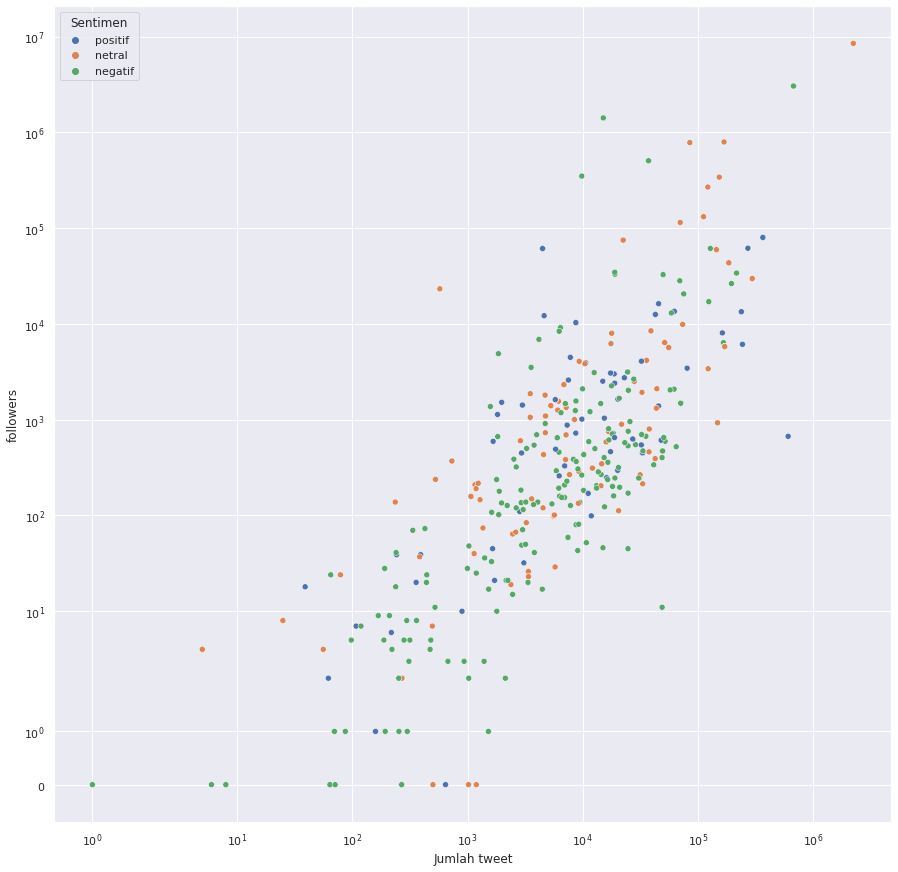

In [ ]:

sns.set(rc={'figure.figsize':(15,15)})
sementara = joined
sementara.drop(sementara.index[sementara['Username'] == "Metro_TV"], inplace = True)
sementara.drop(sementara.index[sementara['Username'] == "kemkominfo"], inplace = True)
g = sns.scatterplot(data=joined, x="Jumlah tweet", y="followers", hue ="Sentimen")
g.set(yscale = 'symlog', xscale = 'symlog')


[None, None]

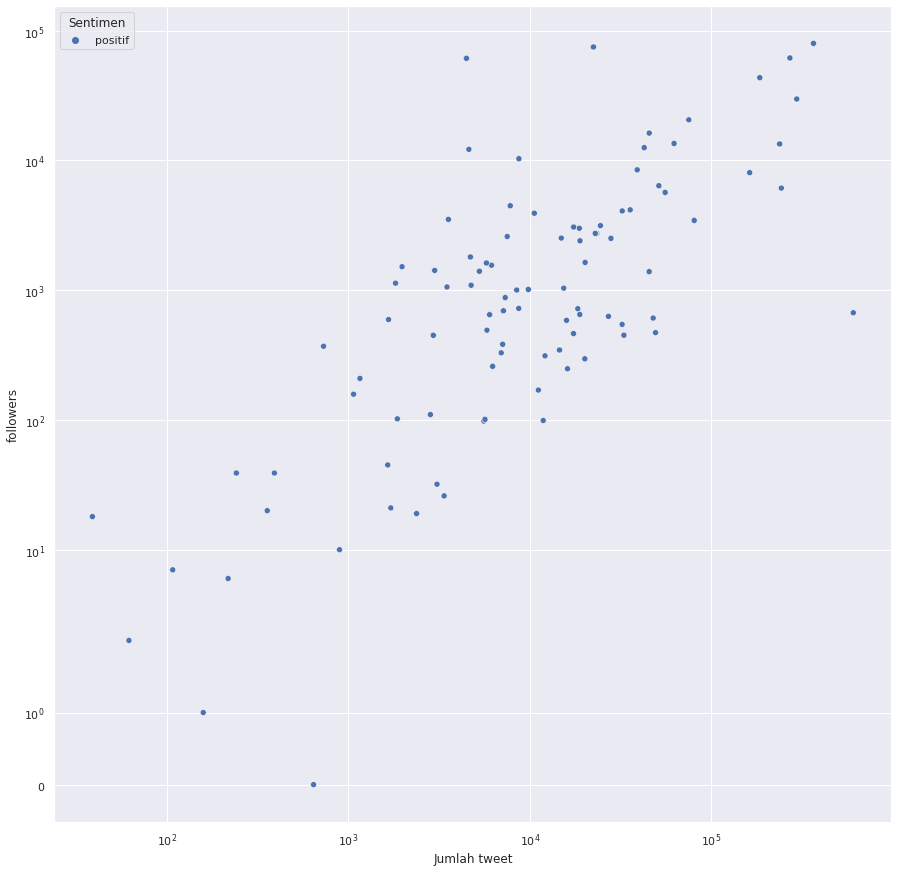

In [ ]:
positif = joined[joined.Sentimen == "positif"]
sns.set(rc={'figure.figsize':(15,15)})
g = sns.scatterplot(data=positif, x="Jumlah tweet", y="followers", hue ="Sentimen")
g.set(yscale = 'symlog', xscale = 'symlog')

[None, None]

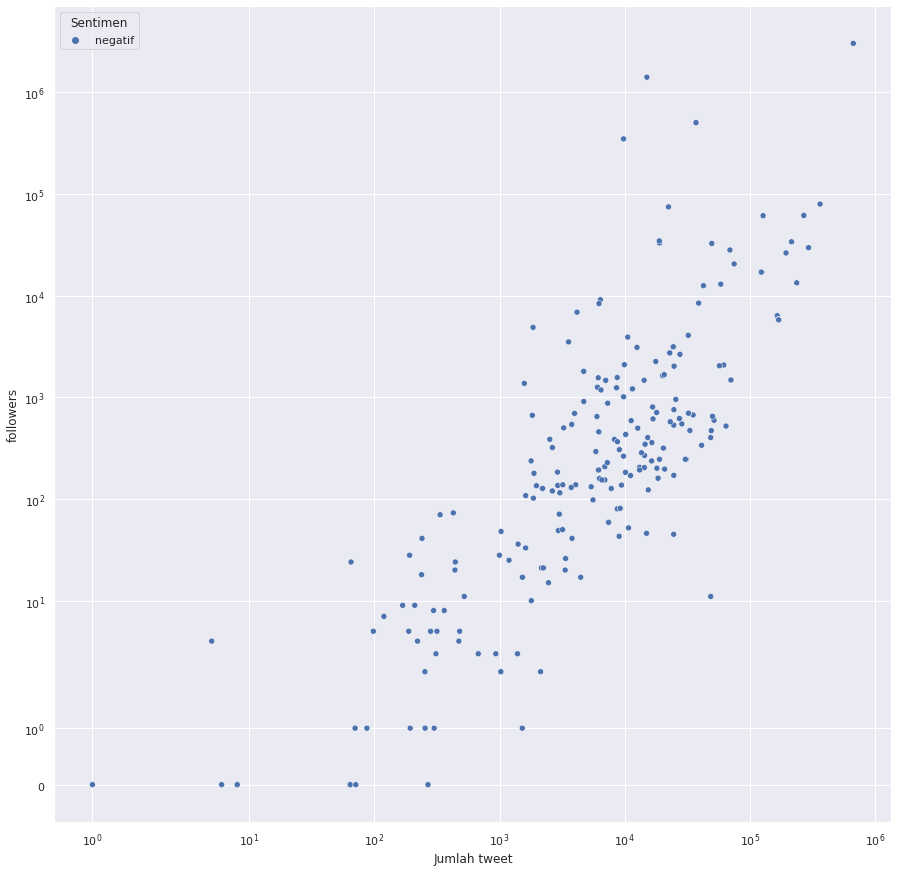

In [ ]:
negatif = joined[joined.Sentimen == "negatif"]
sns.set(rc={'figure.figsize':(15,15)})
g = sns.scatterplot(data=negatif, x="Jumlah tweet", y="followers", hue ="Sentimen")
g.set(yscale = 'symlog', xscale = 'symlog')

[None, None]

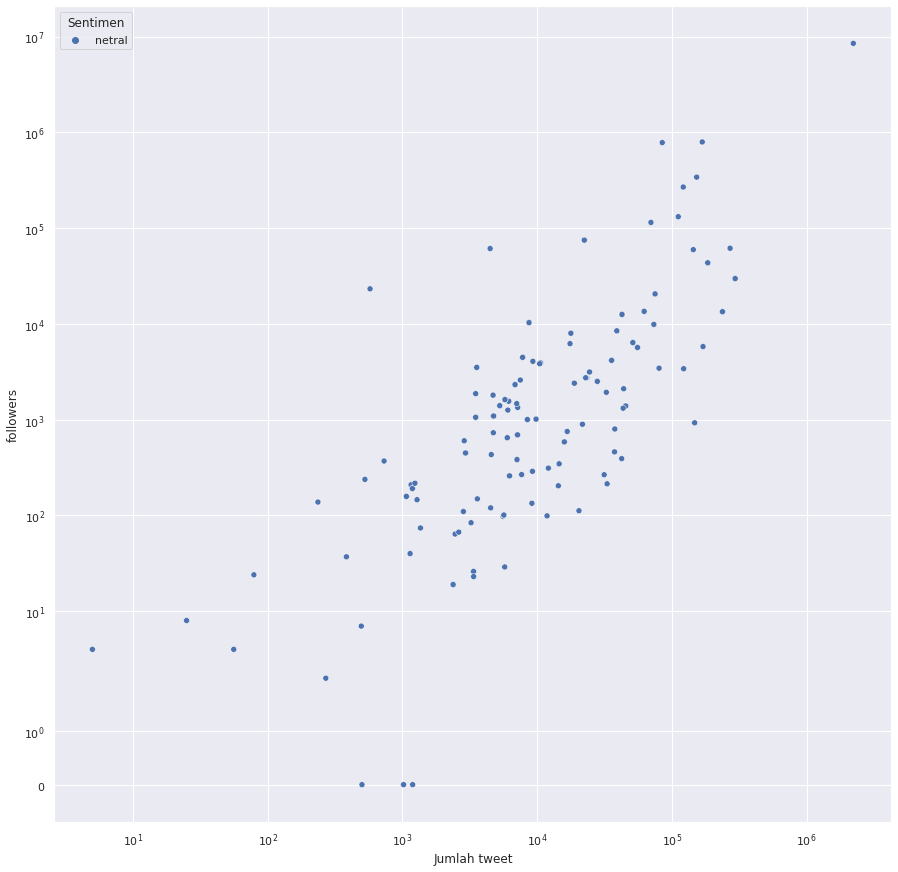

In [ ]:
netral = joined[joined.Sentimen == "netral"]

sns.set(rc={'figure.figsize':(15,15)})

g = sns.scatterplot(data=netral, x="Jumlah tweet", y="followers", hue ="Sentimen")
g.set(yscale = 'symlog', xscale = 'symlog')